In [1]:
from pprint import pprint

In [2]:
import pandas as pd
import os
import glob
  

path = os.getcwd()
files = glob.glob(os.path.join(path+"\ml-latest-small", "*.csv"))
files_lst = []
for f in files:

    df = pd.read_csv(f)
    files_lst.append(df)
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: S:\Fall2021\CSE482\ml-latest-small\links.csv
File Name: links.csv
Content:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0



Location: S:\Fall2021\CSE482\ml-latest-small\movies.csv
File Name: movies.csv
Content:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation



Location: S:\Fall2021\CSE482\ml-latest-small\ratings.csv
File Name: ratings.csv
Content:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352



Location: S:\Fall2021\CSE482\ml-latest-small\tags.csv
File Name: tags.csv
Content:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [4]:
temp = files_lst[0]

for i in range(1,len(files_lst)):
    temp = pd.merge(left = temp, right = files_lst[i], how = 'left')
temp = temp.sort_values(by=['userId'])
#pd.set_option('display.max_rows', 1000000)
temp = temp.iloc[:,:-1]
temp = temp.dropna()
temp.head()


,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0
35549,1777,120888,11003.0,"Wedding Singer, The (1998)",Comedy|Romance,1.0,4.0,964981230.0
35250,1732,118715,115.0,"Big Lebowski, The (1998)",Comedy|Crime,1.0,5.0,964981125.0
34349,1676,120201,563.0,Starship Troopers (1997),Action|Sci-Fi,1.0,3.0,964982620.0
2379,50,114814,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1.0,5.0,964982931.0


In [5]:
temp.shape

(100823, 8)

In [6]:
# trimp up the "don't like movie rating"
import numpy as np
temp_2 = temp.groupby(['userId']).agg({'rating':[np.mean]})
print(temp_2)

          rating
            mean
userId          
1.0     4.366379
2.0     3.948276
3.0     2.368421
4.0     3.555556
5.0     3.636364
...          ...
606.0   3.657540
607.0   3.786096
608.0   3.134176
609.0   3.270270
610.0   3.688556

[610 rows x 1 columns]


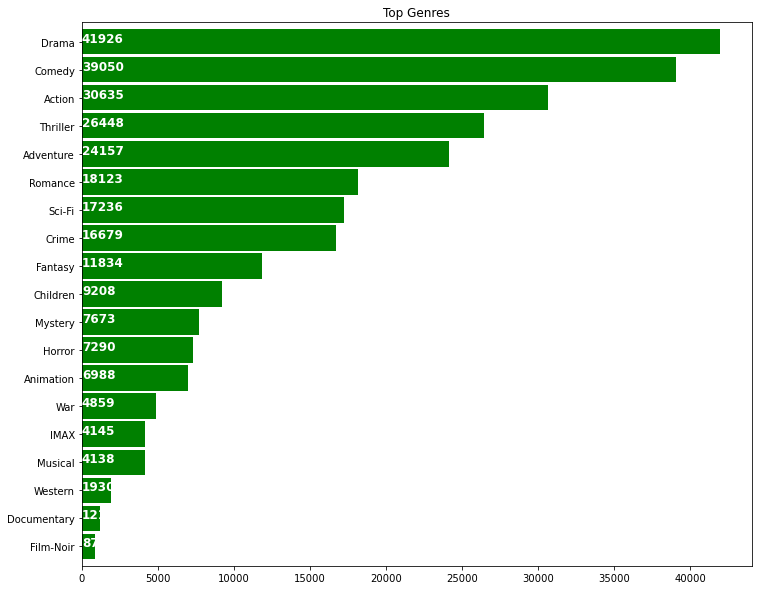

{'Horror', 'Comedy', 'IMAX', 'Fantasy', 'Mystery', 'Children', 'Sci-Fi', '(no genres listed)', 'Drama', 'War', 'Romance', 'Animation', 'Western', 'Thriller', 'Musical', 'Adventure', 'Crime', 'Documentary', 'Film-Noir', 'Action'}


In [7]:
%matplotlib inline  
from matplotlib import pyplot as plt 
plt.subplots(figsize=(12,10))
list1 = []
set_1 = set()
gen_lst = []
for i in temp['genres']:
    #print(i)
    i_lst = i.split('|')
    #print(i_lst)
    temp_set = set(i_lst)
    set_1 = set_1.union(temp_set)
    list1.extend(i_lst)
    gen_lst.append(i_lst)
l = len(set_1) -1
ax = pd.Series(list1).value_counts()[:l].sort_values(ascending=True).plot.barh(width=0.9,color='green')
for i, v in enumerate(pd.Series(list1).value_counts()[:l].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()
print(set_1)
#print(gen_lst)

In [13]:
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
#creating labelEncoder
#le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
#gen_encoded=le.fit_transform(list(set_1))
#print(gen_encoded)



In [14]:

pprint(gen_lst[0:10])

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Crime'],
 ['Action', 'Sci-Fi'],
 ['Crime', 'Mystery', 'Thriller'],
 ['Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Mystery', 'Thriller'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Comedy'],
 ['Crime', 'Drama', 'Mystery', 'Thriller']]


In [15]:
#gen_numeric = []
#print(len(gen_lst))
#for i in range(len(gen_lst)):
   # l = le.transform(gen_lst[i])
   # gen_numeric.append(l)
    #print(l)

In [16]:



name_l = ['Children', 'Romance', 'Documentary', 'Comedy', 
                            'Animation', 'Mystery', '(no genres listed)', 
                            'IMAX', 'Horror', 'Crime', 'Film-Noir', 'War', 
                            'Drama', 'Western', 'Fantasy', 'Action', 'Adventure', 
                            'Sci-Fi', 'Musical', 'Thriller']

my_lst = []
for i in gen_lst:
    binary_lst = []
    for j in range(len(name_l)):
        if name_l[j] in i:
            binary_lst.append(1)
        else:
            binary_lst.append(0)
    my_lst.append(binary_lst)

pprint(my_lst[0:5])
    



[[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


In [38]:
new_pd = temp['userId']
matrix_20 = np.array(my_lst)
pd_20 = pd.DataFrame(data=matrix_20)
pd_20.columns = name_l 
pd_20.head()

,Children,Romance,Documentary,Comedy,Animation,Mystery,(no genres listed),IMAX,Horror,Crime,Film-Noir,War,Drama,Western,Fantasy,Action,Adventure,Sci-Fi,Musical,Thriller
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [39]:
#print(temp['userId'][0:5])
#print(len(my_lst))
#knn = NearestNeighbors(n_neighbors=10)
#knn.fit(np.array(temp['userId']).reshape(-1,1),my_lst)

knn = NearestNeighbors(n_neighbors=20, radius=0.5)
knn.fit(pd_20)

NearestNeighbors(n_neighbors=20, radius=0.5)

In [30]:
#distances, indices = knn.kneighbors(my_lst)
#print(distances)

In [31]:
#knn.kneighbors(np.array(my_lst[0]).reshape(-1, 1))

In [24]:
#print(y_pred)